# Import Data
Data is imported from the train.csv.gz file in the data folder. This data was downloaded from the Kaggle.com
* Load dataframe using Pandas
* Create categorical target with 10 categories [0-9]
* Normalize and format our training data

In [1]:
import keras
import numpy as np
import pandas as pd

df = pd.read_csv("data/train.csv.gz")
y = keras.utils.to_categorical(df[df.columns[0]], 10)
X = np.array(df[df.columns[1:]], dtype=float).reshape(df.shape[0], 784) / 255

train_size = int(X.shape[0] * .75)

Using TensorFlow backend.


# Principle component analysis
Use only 50 features out of the 784 possible features. This should make for a much smaller neural network

In [2]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
training_data = pca.fit_transform(X[:train_size], y[:train_size])

# Network Setup
* Create a model using the sequential api
* Dense layer with 512 neurons using a rectified linear unit activation function
* 20 percent dropout layer
* Dense layer with 512 neurons and a relu activation function
* 20 percent dropout layer
* Dense layer with 10 neurons representing our output layer using a softmax activation function

In [3]:
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.optimizers import RMSprop

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(50,)))
model.add(Dense(10, activation='softmax'))

# Training
* Loss is calculated as categorical cross entropy 
* RMS Prop is used for optimization of the network 

In [4]:
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

history = LossHistory()
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.001), metrics=['accuracy'])
model.fit(training_data, y[:train_size], batch_size=1000, epochs=20, verbose=False, 
          callbacks=[history])

# Optimization
Plot the loss after each training batch

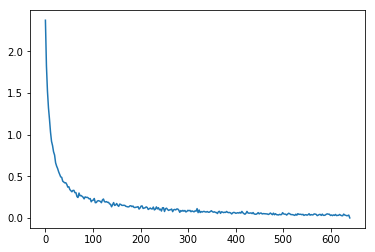

In [5]:
from scipy.interpolate import spline
import matplotlib.pyplot as plt

plot_x = np.array(range(0, len(history.losses)))
plot_sx = np.linspace(0, len(history.losses), 300)
plot_y = spline(plot_x, history.losses, plot_sx)
plt.plot(plot_sx, plot_y)
plt.show()

In [6]:
from sklearn import metrics

predicted = np.argmax(model.predict(pca.transform(X[train_size:])), axis=1)
actual = np.argmax(y[train_size:], axis=1)
print(metrics.classification_report(actual, predicted))
print(metrics.confusion_matrix(actual, predicted))

             precision    recall  f1-score   support

          0       0.98      0.99      0.98      1063
          1       0.98      0.99      0.99      1182
          2       0.98      0.97      0.98      1005
          3       0.98      0.97      0.97      1108
          4       0.99      0.97      0.98       985
          5       0.97      0.97      0.97       940
          6       0.98      0.98      0.98      1042
          7       0.97      0.99      0.98      1111
          8       0.97      0.97      0.97      1021
          9       0.96      0.96      0.96      1043

avg / total       0.98      0.98      0.98     10500

[[1053    0    0    0    0    1    6    0    3    0]
 [   0 1168    2    3    1    0    0    3    4    1]
 [   6    0  979    2    2    1    5    5    3    2]
 [   1    1    9 1070    0    7    0    6    7    7]
 [   0    6    0    0  960    0    3    1    2   13]
 [   4    3    0    6    2  915    2    1    4    3]
 [   6    1    2    0    1    6 1026    0  